In [10]:
!{sys.executable} -m pip install seaborn


In [11]:
from azureml.core import Workspace, Dataset, Experiment

In [12]:
# Load the workspace from the saved config file
ws = Workspace.from_config()

# Access the registered dataset
processed_data = Dataset.get_by_name(workspace=ws, name='iris_data_set')

# Load the dataset into a pandas DataFrame
df = processed_data.to_pandas_dataframe()

{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe'}
{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe', 'activityApp': 'TabularDataset'}


In [27]:
# Step 2: Create or get an existing experiment 
experiment = Experiment(workspace=ws, name='exploratory_data_analysis')

# Start a new run 
run = experiment.start_logging()

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

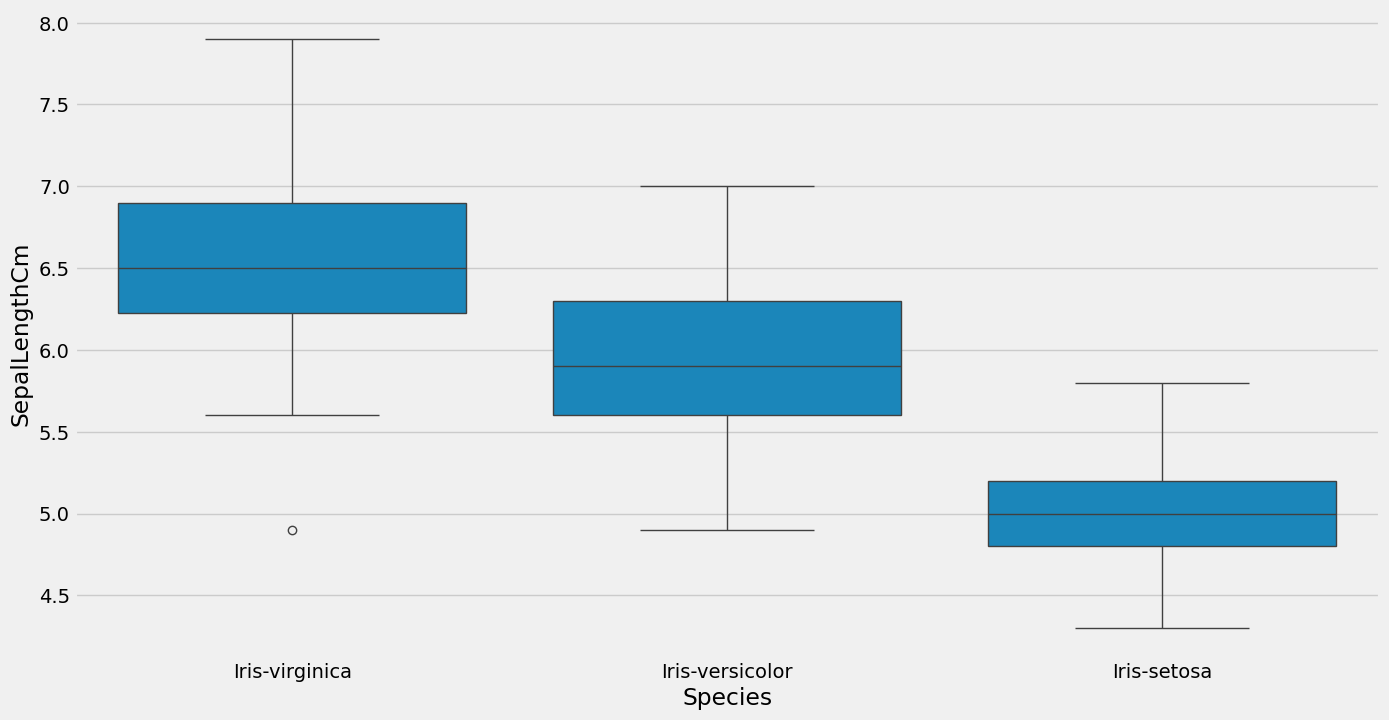

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

# Save the plot to a file 
image_path = "sine_wave.png" 
plt.savefig(image_path) 

# Log the image as an artifact 
run.log_image(name="Box Plot", path=image_path)

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

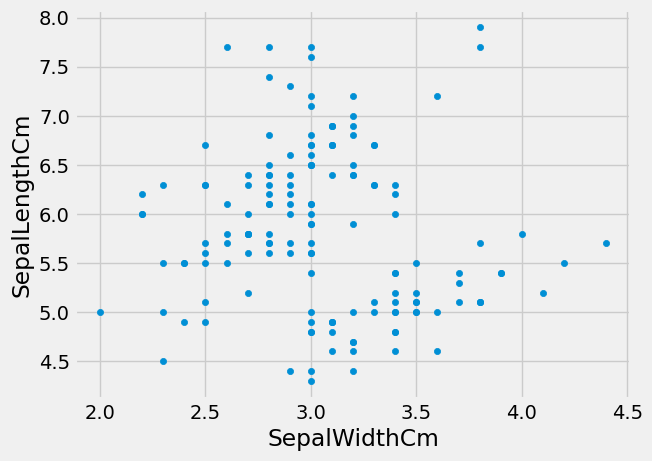

In [18]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

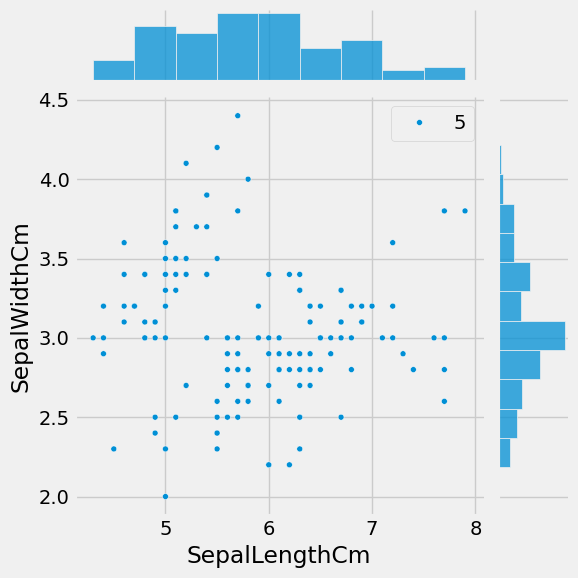

In [19]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5) 

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


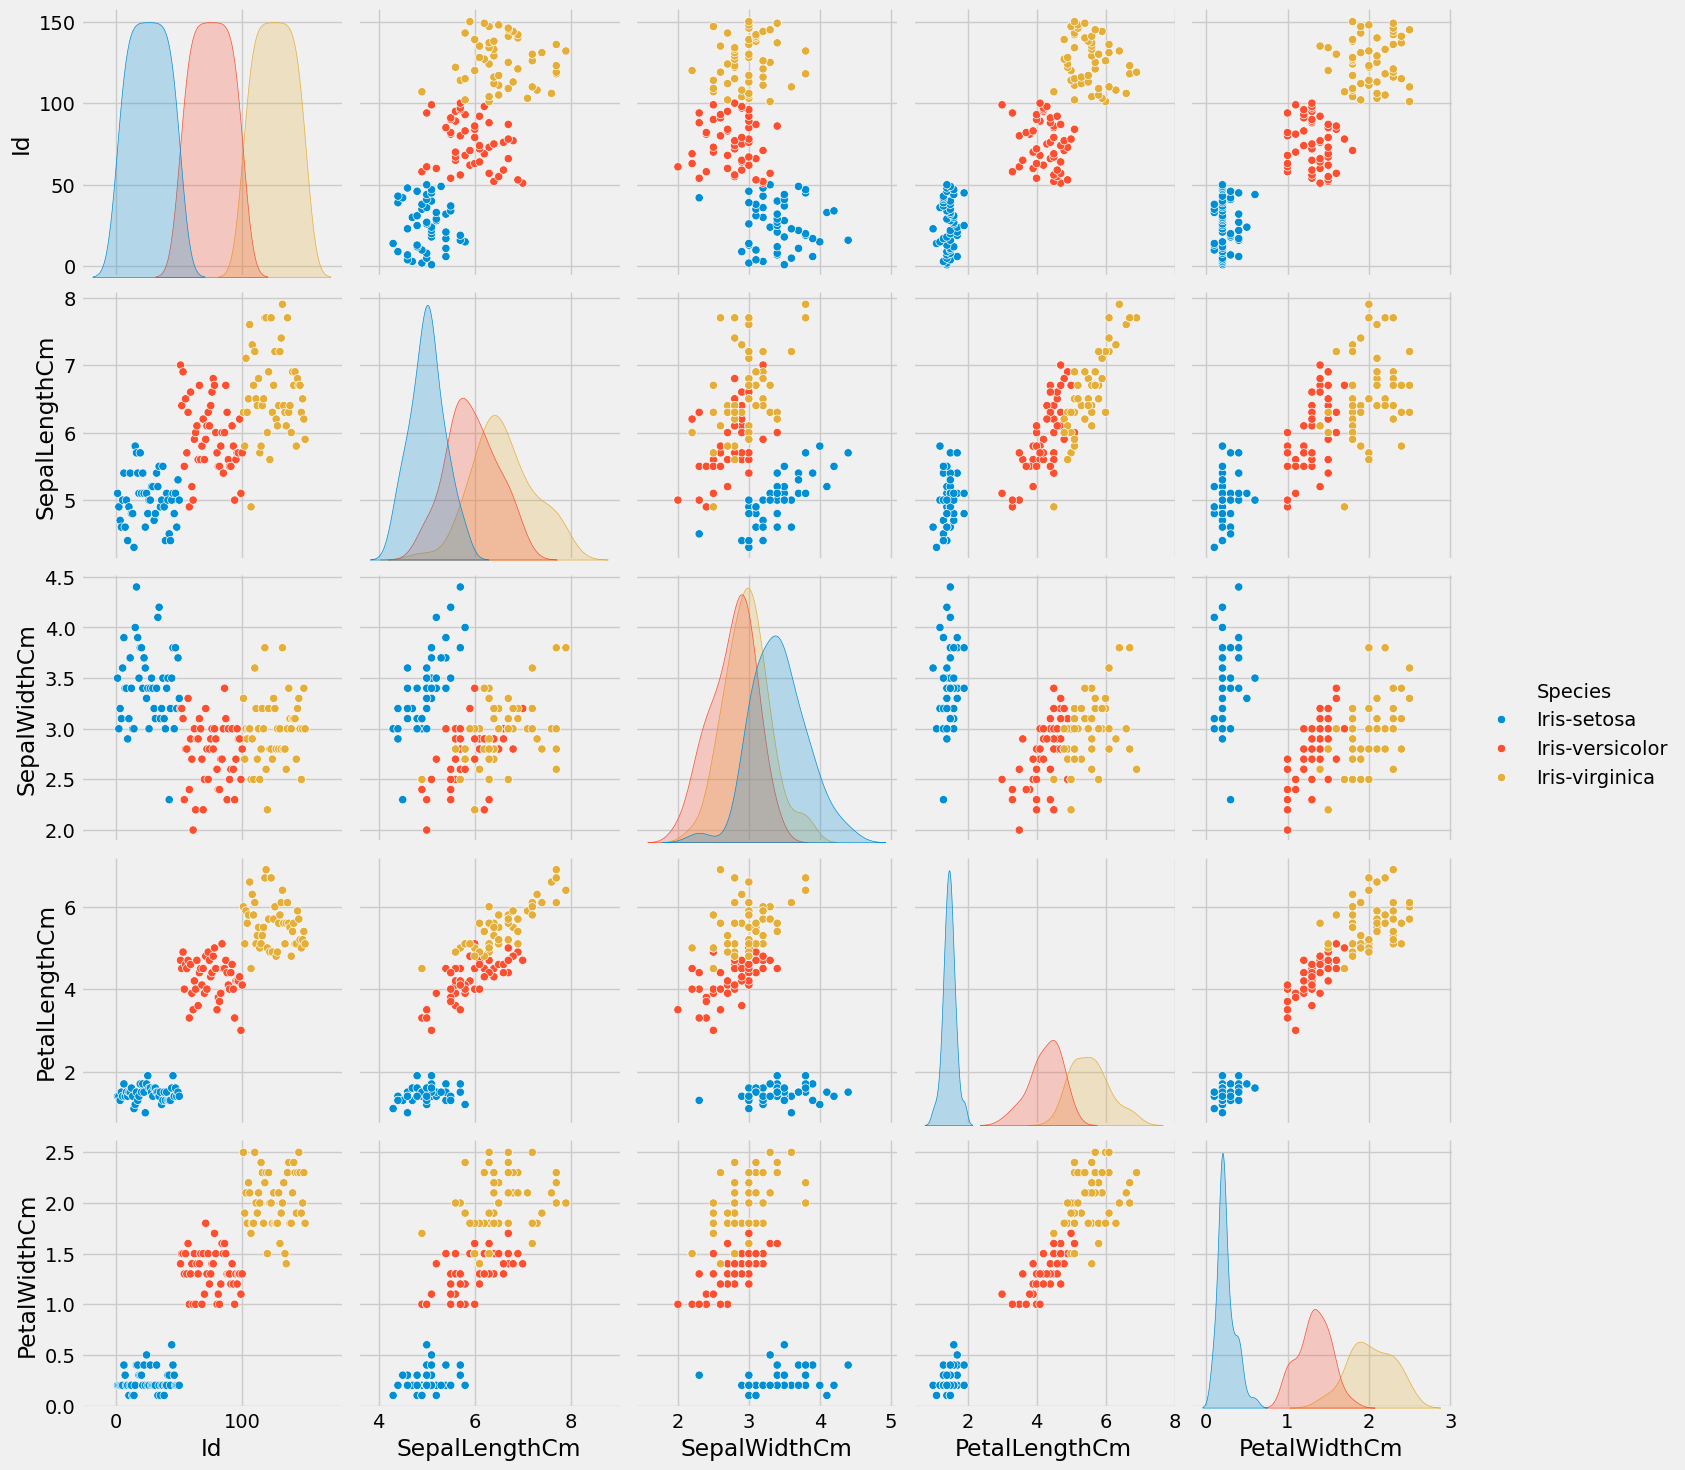

In [21]:
sns.pairplot(df, hue="Species", size=3)

array([[<Axes: title={'center': 'Id'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>,
        <Axes: >]], dtype=object)

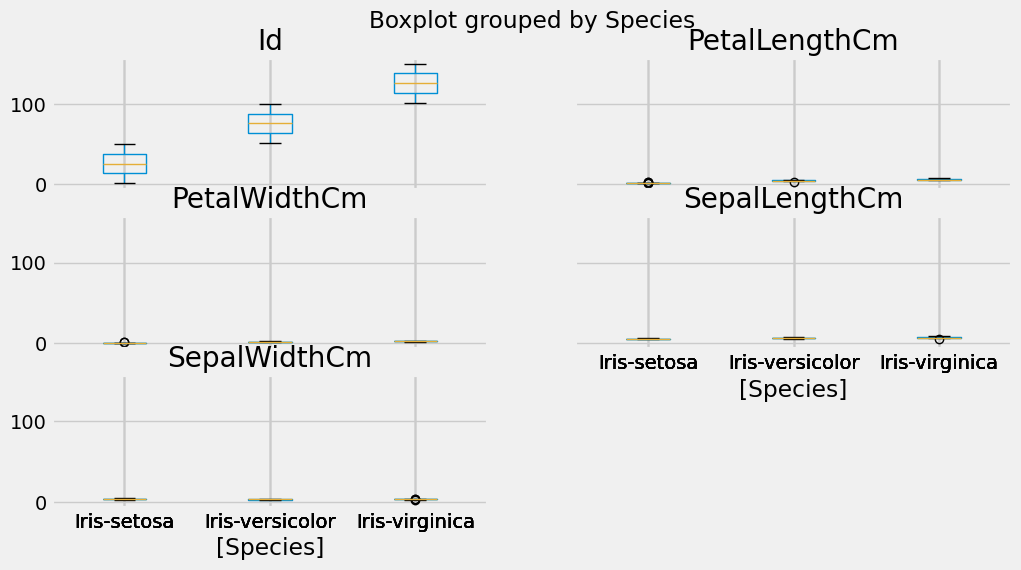

In [22]:
df.boxplot(by="Species", figsize=(12, 6))

<Axes: >

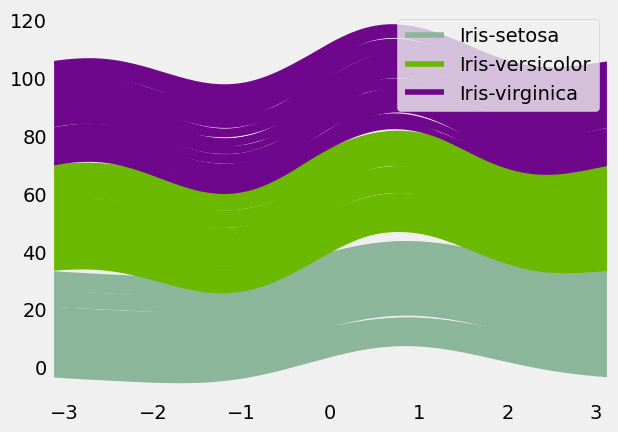

In [24]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

In [25]:
numeric_df = df.select_dtypes(include=['number'])  # Select numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


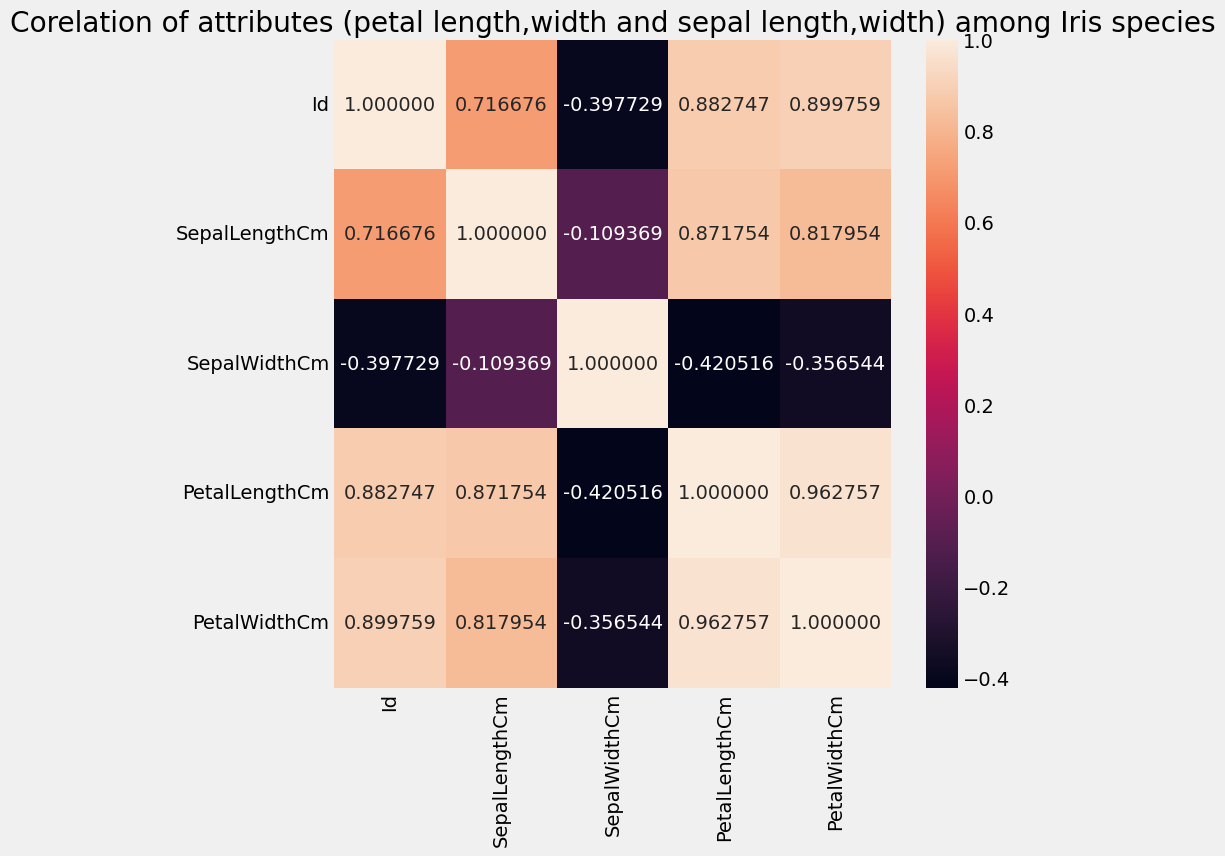

In [26]:
plt.subplots(figsize = (8,8))
sns.heatmap(correlation_matrix, annot=True,fmt="f").set_title("Corelation of attributes (petal length,width and sepal length,width) among Iris species")
plt.show()

In [ ]:
# Complete the run 
run.complete()